### Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

### Load and Explore Data

In [2]:
# loading the Iris dataset
iris = load_iris()

In [3]:
X = iris.data
y = iris.target

feature_names = iris.feature_names
target_names = iris.target_names

In [4]:
# conver to a DataFrame for better visualization
data = pd.DataFrame(X, columns = feature_names)
data['target'] = y
data['species'] = data['target'].apply(lambda x: target_names[x])

In [5]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Preprocess Data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state = 42)

### Train an AdaBoostClassifier

In [8]:
# initialize a base estimator
base_estimator = DecisionTreeClassifier(max_depth = 1)

# initialize AdaBoost with base_estimator
adaboost_clf = AdaBoostClassifier(estimator = base_estimator, n_estimators = 50,
                                learning_rate = 1.0, random_state = 42,
                                 algorithm='SAMME')

adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

### Evaluate the model

In [9]:
# Make predictions
y_pred = adaboost_clf.predict(X_test)

# evaluate performance
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report: ")
print(classification_report(y_test, y_pred))

Accuracy: 0.9333333333333333
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### Confusion Matrix

In [10]:
cm = confusion_matrix(y_test, y_pred)

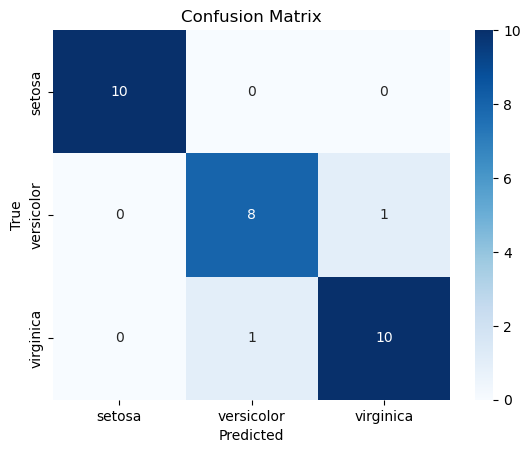

In [11]:
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues", 
           xticklabels = target_names, yticklabels = target_names)
plt.xlabel("Predicted")
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()

### Visualize Feature Importance

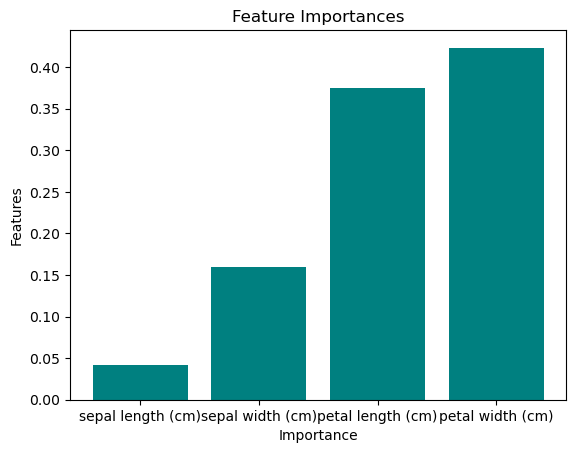

In [12]:
# plot feature importances
importances = adaboost_clf.feature_importances_
plt.bar(feature_names, importances, color = 'teal')
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()